**Sophia Barnhart**  
N15400800  
April 22, 2016

# Assignment \#5: Working with Data in Python

**Due:** 21st April 2016

This exercise is aimed at developing familiarity with the two primary `pandas` objects. 

* `pd.Series(data, index=index ...)`
* `pd.DataFrame(data, columns=columns, index=index ...)`


In [520]:
#Run this Cell#
%matplotlib inline
import pandas as pd

## Question \#1: Pandas Series

A series is a one-dimensional array-like object containing an array of data and an associated array of data labels (called an `index`). 

* (a) Run the following code and explore the pandas series object
* (b) Answer the questions that are in the cells below marked by `[Q]`


In [521]:
s1 = pd.Series([4,7,-5,3])
s2 = pd.Series([4,7,-5,3], index=['a','b','c','d'])

In [522]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


In [523]:
print(s2)

a    4
b    7
c   -5
d    3
dtype: int64


### **[Q]:** What is the difference between the `s1` object and the `s2` object?

**[A]:** `s1` uses indices **0, 1, 2, and 3** (intrinsic index names), whereas `s2` uses strings as indices **a, b, c, and d** (renamed).

In [524]:
#-Sorting by Value-#
s1.sort_values()

2   -5
3    3
0    4
1    7
dtype: int64

In [525]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


### **[Q]:** Using the above example - please explain how the sort_values() method behaves.

**[A]:** The `sort_values()` method sorts the series by `values` in ascending order. On the other hand, the `print()` method sorts the series by `index` in ascending order.

### **[Q]:** How would you save the object that is sorted by `values`?

**[A]:** Redefine the sorted `s1` as `s1_values = s1.sort_values()`. Then, to save the object that is sorted by `values`, I renamed the indices so that they were in ascending order (but did not change the order of the sorted values).

In [526]:
s1_values = s1.sort_values() # Values are sorted in ascending order, but now indices are out of order

In [527]:
print(s1_values)

2   -5
3    3
0    4
1    7
dtype: int64


### **[Q]:** How would you plot the series that is sorted by values. [**Hint** Use the new sorted pandas series you saved above and pay particular attention to the index values.] Reconstruct the image shown below.

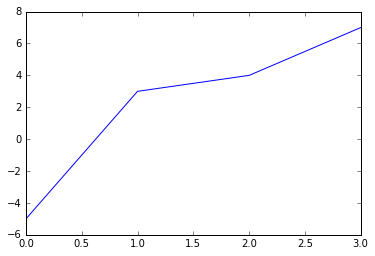

In [528]:
from IPython.display import Image
Image('./assignment5-question1-image1.png')

**[A]** If I were to plot `s1_values`, the plot would be messed up due to the x values being out of order:

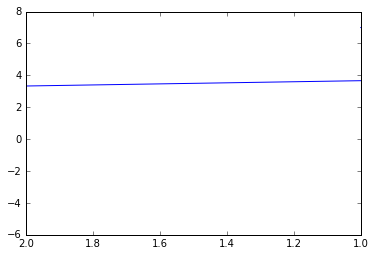

In [529]:
s1_values.plot()

**[A]** Therefore, by renaming the indices, we can re-order them to be in ascending order for proper plotting.

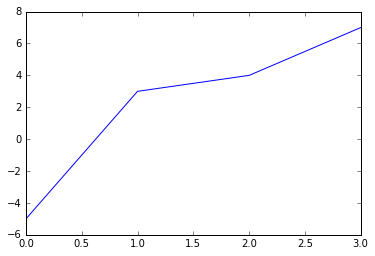

In [530]:
s1_values.rename({2:0, 3:1, 0:2, 1:3}).plot()

### **[Q]** Explore the Series Object. Work with **two** methods below that you find interesting. 

** [A] *Two methods to find series with ascending indices and values:* **

**Method 1:** Manually rename the indices to be in ascending order, then plot. *(as seen above)*

In [531]:
s1_values.rename({2:0, 3:1, 0:2, 1:3})

0   -5
1    3
2    4
3    7
dtype: int64

**Method 2:** Using the `.reset_index()` argument allows us to change the indices back to their standard order.

In [532]:
s1_df = s1_values.reset_index()

In [533]:
s1_df

,index,0
0,2,-5
1,3,3
2,0,4
3,1,7


Our object has transformed from a series to a dataframe (with two series, 'index' and '0'). The former indices are kept under 'index', while a new series of indices (in ascending order) are added on the far left.

In [534]:
s1_df['index']

0    2
1    3
2    0
3    1
Name: index, dtype: int64

In order to index the column '0' holding the original values (in ascending order), we can use two methods:
1. We can index the column of the dataframe we want by **name** (0) -> this may seem confusing because the name of the column is itself an integer.
1. We can index the column of the dataframe we want by **index location** (1)

In [535]:
s1_df[0]

0   -5
1    3
2    4
3    7
Name: 0, dtype: int64

In [536]:
s1_df[s1_df.columns[1]]

0   -5
1    3
2    4
3    7
Name: 0, dtype: int64

In [623]:
s1_df.ix[1,1]

3

In [539]:
s1_df.loc() #locates based on label
s1_df.iloc() #locates based on integer

========================================================================

## Question \#2: Pandas DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

**Different Representations of Data**

In [540]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
     'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [541]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


### **[Q]** Explain how the `dict()` object **d** is being interpreted by Pandas when constructing the dataframe. 

**[A]** When constructing the dataframe, Pandas interprets `dict()` object **d** as two series, **'one'** and **'two'**. The resulting index (**a, b, c, d**) is the **inner** union of the indices of the two series, despite **'one'** only having 3 values (so NaN is given the label d).

### **[Q]** How else might you represent the original data to construct the same dataframe using only ``lists`` rather than a ``dict`` of ``pd.Series``.

In [624]:
data = [
(1, 1),
(2, 2),
(3, 3),
('NaN', 4)
]


In [625]:
type(data)

list

In [626]:
df = pd.DataFrame(data, columns=['one', 'two'], index=['a','b','c','d'])

In [627]:
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


#### Indexing and Values

### **[Q]** Using a fresh copy of `df` as is defined below. How would you change the value from `2` to `100` in the column that is indexed by `two`?. Do **not** change the original data -- manipulate the dataframe object

The resulting DataFrame should look like

||one|two|
|-|---|---|
|a|	1 |	1 |
|b|	2 |	100|
|c|	3 |	3 |
|d|	NaN|4 |



In [544]:
#-Fresh Copy of df-#
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [545]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Using `df.ix`, we can index the row and column we want to manipulate.

In [546]:
df.ix['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [547]:
df['two']

a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

In [548]:
df['two'].ix['b'] = 100

In [549]:
df

,one,two
a,1.0,1.0
b,2.0,100.0
c,3.0,3.0
d,NaN,4.0


#### Working with Data

Using the following GDP per person (in 1000's of US Dollars) from 2008 to 2014 from the IMF's *World Economic Outlook* database

In [550]:
import pandas as pd
data = {'BRA': [13.37, 13.30, 14.34, 15.07, 15.46, 15.98, 16.10],
        'JPN': [33.43, 31.83, 33.71, 34.29, 35.60, 36.79, 37.39],
        'USA': [48.30, 46.91, 48.31, 49.72, 51.41, 52.94, 54.60],
        'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014]}
weo  = pd.DataFrame(data)

In [551]:
weo

,BRA,JPN,USA,Year
0,13.37,33.43,48.30,2008
1,13.30,31.83,46.91,2009
2,14.34,33.71,48.31,2010
3,15.07,34.29,49.72,2011
4,15.46,35.60,51.41,2012
5,15.98,36.79,52.94,2013
6,16.10,37.39,54.60,2014


In [552]:
weo['Year']

0    2008
1    2009
2    2010
3    2011
4    2012
5    2013
6    2014
Name: Year, dtype: int64

### **[Q]** How would you set the index of the dataframe object `weo` to be `Year`?

In [553]:
weo = weo.set_index(['Year'])

In [554]:
weo

,BRA,JPN,USA
Year,,,
2008,13.37,33.43,48.30
2009,13.30,31.83,46.91
2010,14.34,33.71,48.31
2011,15.07,34.29,49.72
2012,15.46,35.60,51.41
2013,15.98,36.79,52.94
2014,16.10,37.39,54.60


**[Q]** How would you plot all three countries timeseries?

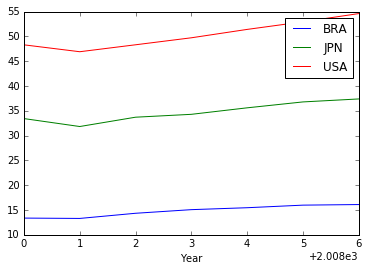

In [555]:
%matplotlib inline
from pandas.io.excel import ExcelFile
import matplotlib.pyplot as plt

weo.plot()

In [556]:
weo.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64', name='Year')

### **[Q]** How would you plot just the time series for the `USA`? [*Hint:* How do you select data in a dataframe]

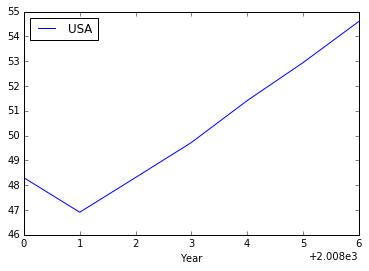

In [557]:
weo_usa = weo[['USA']]

weo_usa.plot()

### **[Q] (Optional - Challenging)** How would you format the plot to show the full year values? (As shown in the image below)

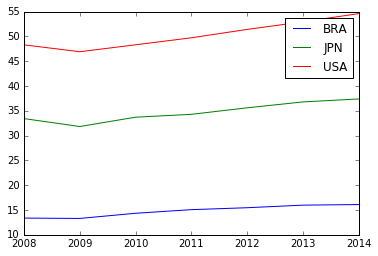

In [558]:
Image('./assignment5-question2-image1.png')

By default, the plot uses scientific notation for the axes. In order to show the full year, we need to convert the years from **integers** to **strings**.

In [559]:
weo

,BRA,JPN,USA
Year,,,
2008,13.37,33.43,48.30
2009,13.30,31.83,46.91
2010,14.34,33.71,48.31
2011,15.07,34.29,49.72
2012,15.46,35.60,51.41
2013,15.98,36.79,52.94
2014,16.10,37.39,54.60


In [560]:
weo.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64', name='Year')

In [561]:
weo_str = weo.index.astype(str)

#### Merging Data

In [562]:
df1 = pd.DataFrame([1, 2, 3], index=['c', 'b', 'a'], columns=['one'])
df2 = pd.DataFrame([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'], columns=['two'])

In [563]:
df1

,one
c,1
b,2
a,3


In [564]:
df2

,two
a,1.0
b,2.0
c,3.0
d,4.0


Use the `merge` method to combine these two dataframes.

In [565]:
df = df1.merge(df2, left_index=True, right_index=True) 

In [566]:
df

,one,two
a,3,1.0
b,2,2.0
c,1,3.0


### **[Q]** Based on the results above. What do you notice about the default *merge* behaviour of Pandas DataFrames?

**[A]** If two dataframes are different in shape, the result of the default `merge` method of Pandas DataFrames will assume the shape of the smaller dataframe. In this case, df1 has 3 rows, whereas df2 has 4 rows. Because there was no 4th row data in df1, the resulting df only has 3 rows when merged.  

This is because the default `merge` behavior is an **inner join**.

### **[Q]** How would you alter the merge so that the resultant dataframe contains the full set of data that is defined in the `df2` object?

The resultant dataframe would look like:

| |one|two|
|-|---|---|
|a|	3 |	1 |
|b|	2 |	2 |
|c|	1 |	3 |
|d|	NaN|4 |

**[A]** One way is to use an **outer join** to include rows a, b, c, AND d.

In [567]:
df_outer = df1.merge(df2, how='outer', left_index=True, right_index=True) #outer join

In [568]:
df_outer

,one,two
a,3.0,1.0
b,2.0,2.0
c,1.0,3.0
d,NaN,4.0


=======================================================================

### Question \#3: World Development Indicators (WDI)

Let's download some WDI data for GDP per Capita (Constant 2005 US$)


In [569]:
from pandas_datareader import data, wb

### **[Q]** Explain the above import statement

We are accessing data from the **World Bank** through the `pandas.io.data module` (a.k.a. `pandas-datareader`), which is then read into a dataframe.

**Using the `wb` object**

In [570]:
#-Search for GDP per Capita Codes-#
wb.search('gdp.*capita.*const')[['id','name']].head()

,id,name
685,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
7460,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
7462,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
7464,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [571]:
#-Download Data-#
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'FR', 'AU'],\
                  start=2005, end=2014)

** View the Data **

In [572]:
dat

NY.GDP.PCAP.KD
country       year                
Australia     2014    37867.767415
              2013    37507.976426
              2012    37241.390414
              2011    36560.441167
              2010    36210.356759
              2009    36050.444884
              2008    36143.475676
              2007    35557.110086
              2006    34484.127368
              2005    33982.950427
France        2014    35660.898603
              2013    35754.651979
              2012    35675.971111
              2011    35772.881814
              2010    35214.132081
              2009    34706.326075
              2008    35942.538142
              2007    36073.518323
              2006    35460.013387
              2005    34879.726329
United States 2014    46405.247065
              2013    45660.733802
              2012    45008.614113
              2011    44324.944522
              2010    43961.168477
              2009    43235.558409
              2008    44861.390895
              2007    45420.187361
              2006    45052.921254
              2005    44307.920585

In [573]:
dat.head()

NY.GDP.PCAP.KD
country   year                
Australia 2014    37867.767415
          2013    37507.976426
          2012    37241.390414
          2011    36560.441167
          2010    36210.356759

In [574]:
dat.index.levels

FrozenList([['Australia', 'France', 'United States'], ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']])

In [575]:
dat.index.names

FrozenList(['country', 'year'])

### **[Q]** What type of object is `dat`

In [576]:
type(dat)

pandas.core.frame.DataFrame

**[A]** dataframe

### **[Q]** What type of object is `dat['NY.GDP.PCAP.KD']`

In [577]:
type(dat['NY.GDP.PCAP.KD'])

pandas.core.series.Series

**[A]** series

### **[Q]** What type of object is `dat[['NY.GDP.PCAP.KD']]`

In [578]:
type(dat[['NY.GDP.PCAP.KD']])

pandas.core.frame.DataFrame

**[A]** dataframe

### **[Q]** How would you compute the average GDP per capita over all years for each country? [*Hint* Use the `groupby` method]

In [579]:
dat.groupby(level=0).mean()

,NY.GDP.PCAP.KD
country,
Australia,36160.604062
France,35514.065784
United States,44823.868648


### **[Q]** How can we reshape `dat` so that countries are listed as the columns [*Hint:* Might consider using `unstack`, or `pivot_table` methods]

In [580]:
dat.unstack(level=0)

NY.GDP.PCAP.KD                            
country      Australia        France United States
year                                              
2005      33982.950427  34879.726329  44307.920585
2006      34484.127368  35460.013387  45052.921254
2007      35557.110086  36073.518323  45420.187361
2008      36143.475676  35942.538142  44861.390895
2009      36050.444884  34706.326075  43235.558409
2010      36210.356759  35214.132081  43961.168477
2011      36560.441167  35772.881814  44324.944522
2012      37241.390414  35675.971111  45008.614113
2013      37507.976426  35754.651979  45660.733802
2014      37867.767415  35660.898603  46405.247065

### **[Q]** How would you plot `Australia's` time series of GDP per Capita

In [617]:
dat_aus = dat[0:10]
dt_

NY.GDP.PCAP.KD
country   year                
Australia 2014    37867.767415
          2013    37507.976426
          2012    37241.390414
          2011    36560.441167
          2010    36210.356759
          2009    36050.444884
          2008    36143.475676
          2007    35557.110086
          2006    34484.127368
          2005    33982.950427

In [618]:
dat_aus.unstack(level=0)

,NY.GDP.PCAP.KD
country,Australia
year,
2005,33982.950427
2006,34484.127368
2007,35557.110086
2008,36143.475676
2009,36050.444884
2010,36210.356759
2011,36560.441167
2012,37241.390414


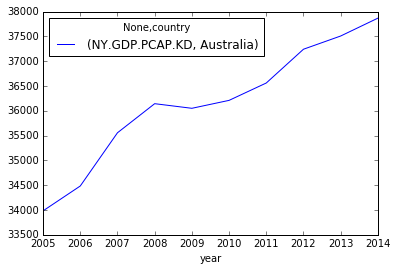

In [619]:
dat_aus.unstack(level=0).plot()